In [4]:
import pandas as pd
from pandas import DataFrame
import nltk
from nltk import FreqDist
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

import pickle
from textblob import TextBlob, Word

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Cannabis_reviews.csv')

In [7]:
reviews=df['text']
reviews.head()

0                                                                                                                                                                                   fire get it why it's hot
1                                                                                                                                  Extremely relaxing. Good head space. Does well to remove stress and pain.
2                                                                                                                                  I really like the taste of this strain, great for morning and afternoon. 
3    Great flavor takes me back to when I first smoked weed. Just the aroma and flavor of the weed is just so nostalgic. Recommend it to every who wants to smoke for the first time/smoke for the first ...
4                                                                                                                                                       This 1 is dankkk\nMy favouri

In [6]:
Pain=df[df['text'].str.contains('pain', na=False)]

In [ ]:
len(Pain)

In [32]:
df = df[df['rating'] > 0]

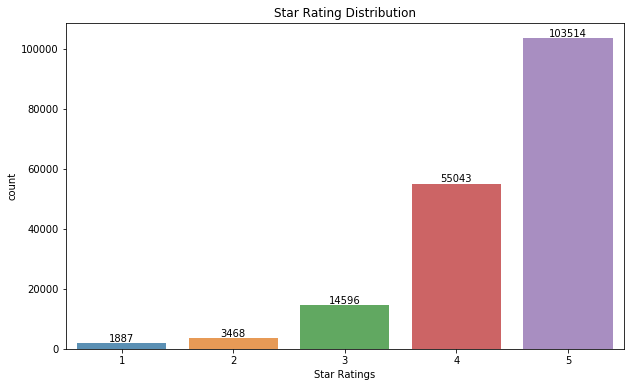

In [33]:
x=df['rating'].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('count')
plt.xlabel('Star Ratings')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

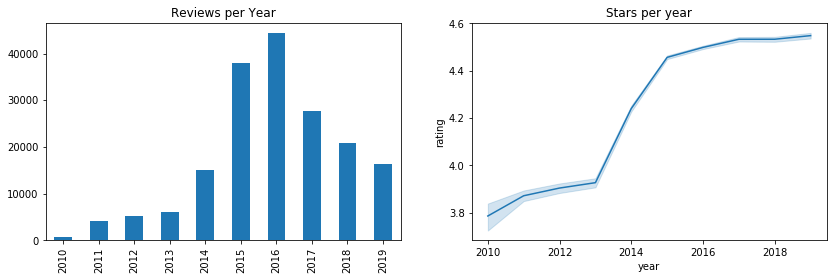

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
df.year.value_counts().sort_index().plot.bar(title='Reviews per Year', ax=axes[0]);
sns.lineplot(x='year', y='rating', data=df, ax=axes[1])
axes[1].set_title('Stars per year');

In [8]:
df['text']=df['text'].astype(str)
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity'] = df['text'].apply(detect_polarity)
df.head()

,review_id,username,text,review_added,rating,star_image,location_slug,location_name,avatar,log_rating,...,negative_effects,flavors,symptoms,conditions,kiosk_curated_list_scores,permalink,sort_name,log_tags,created_at.1,polarity
0,1264200,hardknoxxlif3,fire get it why it's hot,2016-04-23 03:36:25+00,5,https://d3ix816x6wuc0d.cloudfront.net/stars/5/240,NaN,NaN,https://ddd33q3967xhi.cloudfront.net/_LwUSia9OLq1vh_A-_6Ux_-Ybj0=/fit-in/300x300/https%3a%2f%2fpublic.leafly.com%2favatars%2f70.png,"{""score"": 1, ""upVotes"": 1, ""downVotes"": 0}",...,"[{""Id"": ""LogTags-dizzy"", ""Name"": ""Dizzy"", ""Active"": true, ""Category"": ""Negative"", ""DisplayLabel"": ""Dizzy""}, {""Id"": ""LogTags-dry-eyes"", ""Name"": ""Dry Eyes"", ""Active"": true, ""Category"": ""Negative"", ""...","[{""Id"": ""LogTags-sweet"", ""Name"": ""Sweet"", ""Active"": true, ""Category"": ""Flavor"", ""DisplayLabel"": ""Sweet""}, {""Id"": ""LogTags-citrus"", ""Name"": ""Citrus"", ""Active"": true, ""Category"": ""Flavor"", ""DisplayL...","[{""Id"": ""LogTags-depression"", ""Name"": ""Depression"", ""Active"": true, ""Category"": ""Symptom"", ""DisplayLabel"": ""Depression""}, {""Id"": ""LogTags-inflammation"", ""Name"": ""Inflammation"", ""Active"": true, ""Ca...","[{""Id"": ""LogTags-addadhd"", ""Name"": ""ADD/ADHD"", ""Active"": true, ""Category"": ""Condition"", ""DisplayLabel"": ""ADD/ADHD""}, {""Id"": ""LogTags-anxiety"", ""Name"": ""Anxiety"", ""Active"": true, ""Category"": ""Condi...","{""berry-burst"": 0.0, ""diesel-fuel"": 15.605824907095325, ""manage-pain"": 25.035919540229884, ""citrus-squeeze"": 14.054532883933973, ""overcome-anxiety"": 104.58905885403161, ""good-nights-sleep"": 50.855...",https://mobileapi.leafly.com/hybrid/707-headband,707 Headband,"{creative,euphoric,happy,relaxed,uplifted,dizzy,dry-eyes,dry-mouth,paranoid,anxious,addadhd,anxiety,migraines,pms,ptsd,depression,inflammation,muscle-spasms,pain,stress,sweet,citrus,earthy,pungent...",2019-10-10 03:54:37+00,0.250000
1,2200248,BrazilianRedneck870,Extremely relaxing. Good head space. Does well to remove stress and pain.,2019-10-27 17:20:30+00,4,https://d3ix816x6wuc0d.cloudfront.net/stars/4/240,NaN,NaN,https://ddd33q3967xhi.cloudfront.net/mB7zjHN07KpJA9EMeBhVV9a1An0=/fit-in/300x300/https%3a%2f%2fpublic.leafly.com%2favatars%2f16.png,"{""score"": 0, ""upVotes"": 0, ""downVotes"": 0}",...,"[{""Id"": ""LogTags-dizzy"", ""Name"": ""Dizzy"", ""Active"": true, ""Category"": ""Negative"", ""DisplayLabel"": ""Dizzy""}, {""Id"": ""LogTags-dry-eyes"", ""Name"": ""Dry Eyes"", ""Active"": true, ""Category"": ""Negative"", ""...","[{""Id"": ""LogTags-sweet"", ""Name"": ""Sweet"", ""Active"": true, ""Category"": ""Flavor"", ""DisplayLabel"": ""Sweet""}, {""Id"": ""LogTags-berry"", ""Name"": ""Berry"", ""Active"": true, ""Category"": ""Flavor"", ""DisplayLab...","[{""Id"": ""LogTags-depression"", ""Name"": ""Depression"", ""Active"": true, ""Category"": ""Symptom"", ""DisplayLabel"": ""Depression""}, {""Id"": ""LogTags-insomnia"", ""Name"": ""Insomnia"", ""Active"": true, ""Category"":...","[{""Id"": ""LogTags-addadhd"", ""Name"": ""ADD/ADHD"", ""Active"": true, ""Category"": ""Condition"", ""DisplayLabel"": ""ADD/ADHD""}, {""Id"": ""LogTags-anxiety"", ""Name"": ""Anxiety"", ""Active"": true, ""Category"": ""Condi...","{""berry-burst"": 13.323500491642084, ""diesel-fuel"": 17.593411996066862, ""manage-pain"": 12.146017699115049, ""citrus-squeeze"": 0.0, ""overcome-anxiety"": -56.666666666666686, ""good-nights-sleep"": 150.9...",https://mobileapi.leafly.com/indica/3x-crazy,3X Crazy,"{euphoric,happy,relaxed,sleepy,tingly,dizzy,dry-eyes,dry-mouth,paranoid,anxious,addadhd,anxiety,fibromyalgia,migraines,ptsd,depression,insomnia,lack-of-appetite,pain,stress,sweet,berry,lavender,ea...",2019-10-10 03:54:37+00,0.287500
2,1261599,dubabud,"I really like the taste of this strain, great for morning and afternoon.",2016-04-21 20:42:57+00,5,https://d3ix816x6wuc0d.cloudfront.net/stars/5/240,NaN,NaN,https://ddd33q3967xhi.

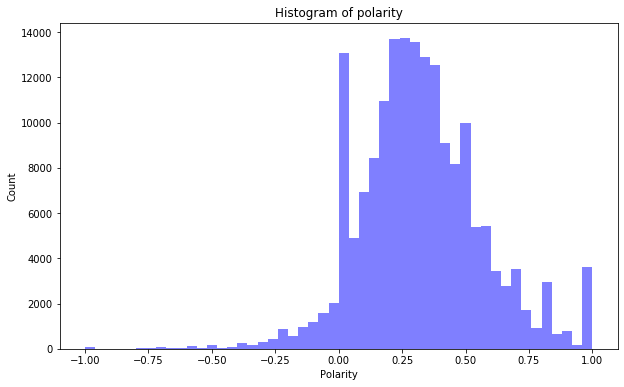

In [41]:
# A histogram of the polarity scores.
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df['polarity'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

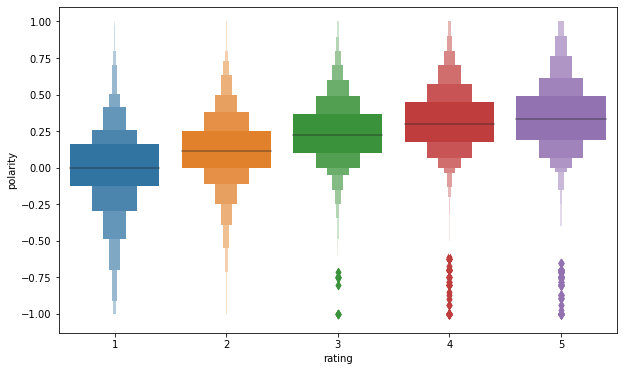

In [43]:
# Box plot of sentiment grouped by stars
plt.figure(figsize=(10,6))
sns.boxenplot(x='rating', y='polarity', data=df)
plt.show();

In [ ]:
search=['pain','headache']
for i in res

In [9]:
df['pain']=df['text'].apply(lambda x: 1 if 'pain' in str(x) else 0)

In [10]:
df1 = df[['review_id','text', 'rating','strain_id', 'year','month', 'name', 'location_name','pain','polarity']]
df1.head()

KeyError: "['year', 'month'] not in index"

In [58]:
np.savetxt("df1.csv", df1, delimiter=",",fmt='%s', header=True)

In [61]:
df1.to_csv('mvp1.csv', header=True)

In [54]:
len(df['location_name'].unique())

2349

In [57]:
df['location_name'].unique()[1:200]

array(['The Clinic Effingham', 'Silver State Relief', 'Acres Cannabis',
       'Ann Arbor Health Patient Collective',
       'HCI Alternatives - Collinsville', 'The Gallery - Spanaway',
       'The Green Solution - Normal', '112th St. Cannabis',
       'The Partakery', 'EarthMed - Addison',
       "CBCB (Cannabis Buyers' Club of Berkeley)",
       'Kush21 - SeaTac Airport', 'Oregrown - Bend, Oregon',
       'Canna Culture Collective', 'The Green Planet - Beaverton',
       'Green Solutions Sacramento', 'Harborside - Oakland',
       'Salveo Health & Wellness',
       'TerraVida Holistic Centers - Abington',
       'TerraVida Holistic Centers - Malvern',
       'Cure Pennsylvania - Lancaster', 'BEYOND / HELLO - Bristol',
       '3C Compassionate Care Center Naperville', 'Preserve Oregon',
       'BEYOND / HELLO - Center City Philadelphia',
       'Herbology - Gettysburg', 'Herbology - DuBois', 'The Dispensary',
       'RISE York', 'The Healing Center - Washington',
       'Midway Dispen

In [24]:
df["Date"]= pd.to_datetime(df["review_added"]) 

In [26]:
df['year'] = df["Date"].dt.year
df['year'][1:6]

1    2019
2    2016
3    2019
4    2019
5    2019
Name: year, dtype: int64

In [28]:
df['month'] = df["Date"].dt.month
df['month'][1:6]

1    10
2     4
3    10
4     9
5     9
Name: month, dtype: int64

In [ ]:
dfPain=df1['pain'==1]

In [ ]:
dfPain['text'][1:20]